<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice MLR using the Sacramento Real Estate Data

_Authors: Joseph Nelson (DC), Matt Brems (DC)_

---

We return to the Sacramento real estate data, but this time around we will be constructing multiple linear regression models. 

You will review the assumptions of multiple linear regression and practice building a model using the statsmodels package.

### 1. Load the data. 

In [1]:
import pandas as pd

shd_csv = './datasets/sacramento_real_estate_transactions_Clean.csv'

shd = pd.read_csv(shd_csv)
shd.head()

,Unnamed: 0,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Dummy Variables

---

It is important to be cautious with categorical variables, those that represent distict groups or categories, when building a regression. If put in a regression "as-is", categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 2. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [2]:
# A:
df = pd.get_dummies(shd['type']) # get dummy variables for type column

In [3]:
df.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [4]:
df.shape

(984, 4)

---

### A caution with dummy-coding

Let's touch on a caution moving forward and interpreting these.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> Scenario 1: Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 3. Remove "Unkown" from your dummy coded variable dataframe and append the rest to the original data.

In [5]:
# removing the unknown column
df = df.drop(['Unkown'], axis=1)
df.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [6]:
new_shd = pd.concat([shd, df], axis=1) # concatenating dummy table to original shd table

In [7]:
# A:
new_shd.head()

,Unnamed: 0,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Condo,Multi-Family,Residential
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1


In [8]:
new_shd = new_shd.loc[new_shd['sq__ft'] > 0, :]

In [9]:
new_shd.shape

(813, 16)

### 4. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

You may use either `sklearn` or `statsmodels` to do this.

In [10]:

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [11]:
x = new_shd[['sq__ft', 'beds', 'baths', 'Residential']]
y = new_shd[['price']]

In [12]:
lm = linear_model.LinearRegression()

In [13]:
model = lm.fit(x,y)

predictions = model.predict(x)
score = model.score(x,y)

In [14]:
score

0.49147471674222742

In [15]:
lm.coef_
print('the coefficients are ', lm.coef_)

the coefficients are  [[   131.41415433 -15404.46388821   7432.22443426  40574.08097965]]


In [16]:
lm.intercept_
print('the intercept is ', lm.intercept_)

the intercept is  [ 17835.55592868]


In [17]:
new_shd['y_pred'] = predictions

### 5. Plot the residuals against the true points to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

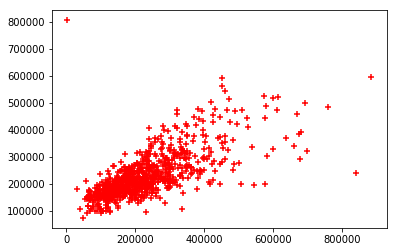

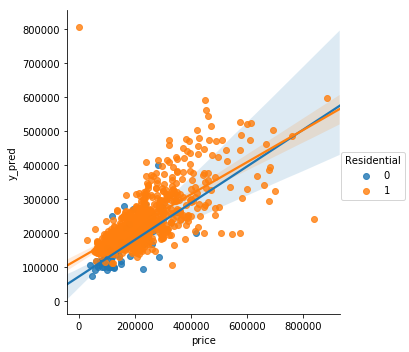

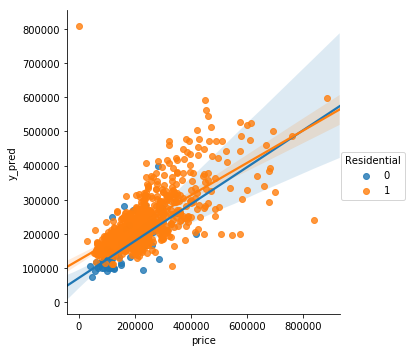

In [31]:
# A:
sns.lmplot(x='price', y='y_pred', data=new_shd, hue='Residential')
plt.show()

In [29]:
plt.scatter(y, predictions, marker='+', c='red')

### 6. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [19]:
# A:
# Linearity : Y must have approximately a linear relationship with each independ Xi
# Independence: Errors (residuals) must be independent from one another
# Normality: the errors (residuals) follow a normal distribution
# Equality of variances: the errors should have a consistent pattern regardless the value of Xi predictors.
# indepedence of Predictors: the independent variables Xi and Xj must be independent of one another for any i != j

### 7. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [20]:
# A:

### 8. Explain what the intercept in your model means in the context of your predictor variables.

In [32]:
lm.intercept_
print('the intercept is ', lm.intercept_)

the intercept is  [ 17835.55592868]


In [33]:
lm.coef_
print('the coefficients are ', lm.coef_)

the coefficients are  [[   131.41415433 -15404.46388821   7432.22443426  40574.08097965]]


### 9. Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` function.

In [34]:
# A:
import statsmodels.api as sm

model = sm.OLS(y,x).fit()

model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1651.
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:34:42   Log-Likelihood:                -10386.
No. Observations:                 813   AIC:                         2.078e+04
Df Residuals:                     809   BIC:                         2.080e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sq__ft        129.9309      7.162     18.141      0.000     115.872     143.990
beds         -1.31e+04   4902.409     -2.673      0.008   -2.27e+04   -3480.377
baths        9390.2447   6684.083      1.405      0.160   -3729.946    2.25e+04
Residential  4.936e+04   9933.815      4.969      0.000    2.99e+04    6.89e+04
==============================================================================
Omnibus:                      211.047   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6595.500
Skew:                           0.473   Prob(JB):                         0.00
Kurtosis:                      16.921   Cond. No.                     5.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 10. [Bonus] Summarize your findings.

You work for a real estate agency. You are asked to prepare an executive summary for your very busy boss highlighting the most important findings from your MLR model. Convey these findings in no more than two paragraphs. Be sure to briefly address any potential shortcomings of your model.


In [23]:
# A: 